This notebook does an initial analysis on the taxi and weather data for January 2018 by plotting graphs and see if there is a correlation.

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('yellow_tripdata_2017-01.csv')

In [4]:
df.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount'],
      dtype='object')

In [5]:
import numpy as np

In [7]:
weather_df = pd.read_csv('weather-2011-2017.csv')

In [8]:
weather_df.columns

Index(['    Date', 'Time', '  Spd', '  Visb', '  Temp', ' Prcp', '  SD',
       '    SDW', ' SA'],
      dtype='object')

In [9]:
taxi_df=df.copy()

In [10]:
from datetime import datetime
taxi_df['tpep_pickup_datetime']=pd.to_datetime(taxi_df['tpep_pickup_datetime'])

In [11]:
taxi_df['date']= taxi_df['tpep_pickup_datetime'].apply(lambda x: x.date())

In [12]:
grouped_taxi_df = taxi_df.groupby(['date']).size().reset_index(name='counts')

In [13]:
# ATTRIBUTE,DEFINITION,UNIT,DEFAULT VALUE
# "Date","The date of the observation","YYYYMMDD",none
# "Time","The time of the observation","HHmm",none
# "Spd","The wind speed rate, which is the rate of horizontal travel of air past a fixed point.","Meters per second",999.9
# "Visb","The horizontal distance at which an object can be seen and identified.","Meters",999999
# "Temp","The temperature of the air.","Degrees Celsius",+9999
# "Prcp","The depth of liquid precipitation that is measured at the time of an observation.","Millimeters",999.9
# "SD","The depth of snow and ice on the ground.","Centimeters",9999
# "SDW","The depth of the liquid content of snow precipitation that has accumulated on the ground.","Millimeters",99999.9
# "SA","The depth of a snow accumulation.","Centimeters",999


In [14]:
weather_df['    Date'] = weather_df.astype(str)

In [15]:

weather_df['date']= weather_df['    Date'].apply(lambda d: d[0:4]+"-"+d[4:6]+"-"+d[6:8])

In [16]:
weather_df['date'] = pd.to_datetime(weather_df['date'])

In [17]:
weather_df = weather_df.loc[weather_df['  Temp']!= 999.9]

In [18]:
weather_jan_2017 = weather_df.loc[(weather_df['date'].dt.year==2017)& (weather_df['date'].dt.month==1)]

In [19]:
grouped_weather_df = weather_jan_2017[['date','  Temp', ' Prcp', '  SD']].groupby(['date']).mean()

In [20]:
grouped_taxi_df = taxi_df.groupby(['date']).size().reset_index(name='counts')

In [21]:
grouped_taxi_df.set_index('date', inplace=True)

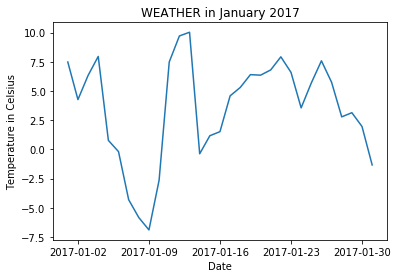

In [22]:
import matplotlib.pyplot as plt
x=grouped_weather_df.index.tolist()
y=grouped_weather_df['  Temp'].tolist()
plt.title("WEATHER in January 2017")
plt.xlabel("Date")
plt.ylabel("Temperature in Celsius")
plt.plot(x,y)
plt.show()

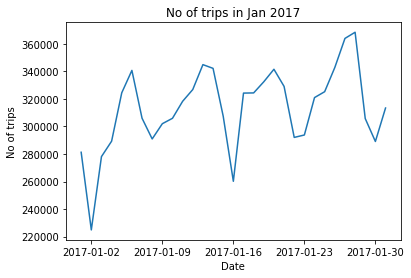

In [23]:
a=grouped_taxi_df.index.tolist()
b=grouped_taxi_df['counts'].tolist()
plt.title("No of trips in Jan 2017")
plt.xlabel("Date")
plt.ylabel("No of trips")
plt.plot(a,b)
plt.show()

In [26]:
grouped_fare_df = taxi_df[['date','total_amount','trip_distance']].groupby(['date']).mean()
grouped_fare_df.head()

,total_amount,trip_distance
date,,
2017-01-01,18.333764,3.419228
2017-01-02,15.678134,3.277292
2017-01-03,15.378401,2.884096
2017-01-04,15.468951,2.847471
2017-01-05,15.006886,2.684058


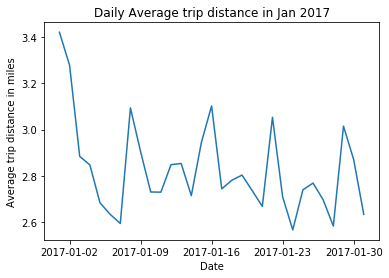

In [29]:
a=grouped_fare_df.index.tolist()
b=grouped_fare_df['trip_distance'].tolist()
plt.title("Daily Average trip distance in Jan 2017")
plt.xlabel("Date")
plt.ylabel("Average trip distance in miles")
plt.plot(a,b)
plt.show()

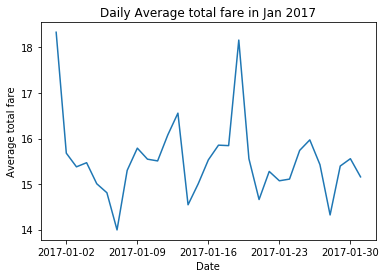

In [30]:
a=grouped_fare_df.index.tolist()
b=grouped_fare_df['total_amount'].tolist()
plt.title("Daily Average total fare in Jan 2017")
plt.xlabel("Date")
plt.ylabel("Average total fare")
plt.plot(a,b)
plt.show()